In [42]:
#Importing necessary libraries for initial data analysis and visualisation .

import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sklearn
import matplotlib

from sklearn.preprocessing import LabelEncoder



In [43]:
#loading data.

df = pd.read_csv("/Users/nazeeha/Downloads/archive/ASSIDATA.csv")
df.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
0,OCCURRED_D,OCCURRED_T,UOFNum,CURRENT_BA,OffSex,OffRace,HIRE_DT,INCIDENT_DATE_LESS_,OFF_INJURE,OFF_INJURE_DESC,...,ForceType3,ForceType4,ForceType5,ForceType6,ForceType7,ForceType8,ForceType9,ForceType10,Cycles_Num,ForceEffec
1,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [44]:
#checking the dimension of the data . 
df.shape

(2384, 47)

In [45]:
#checking for null values.
df.isna()



,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2380,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2381,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2382,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False


In [46]:
#The first row of the dataframe contained a second heading for the coloumns which is quite useless, hence dropping it .
df = df.drop(index=[0] , axis=0)

In [47]:
df.head()

,INCIDENT_DATE,INCIDENT_TIME,UOF_NUMBER,OFFICER_ID,OFFICER_GENDER,OFFICER_RACE,OFFICER_HIRE_DATE,OFFICER_YEARS_ON_FORCE,OFFICER_INJURY,OFFICER_INJURY_TYPE,...,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,TYPE_OF_FORCE_USED5,TYPE_OF_FORCE_USED6,TYPE_OF_FORCE_USED7,TYPE_OF_FORCE_USED8,TYPE_OF_FORCE_USED9,TYPE_OF_FORCE_USED10,NUMBER_EC_CYCLES,FORCE_EFFECTIVE
1,9/3/16,4:14:00 AM,37702,10810,Male,Black,5/7/14,2,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
2,3/22/16,11:00:00 PM,33413,7706,Male,White,1/8/99,17,Yes,Sprain/Strain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,5/22/16,1:29:00 PM,34567,11014,Male,Black,5/20/15,1,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
4,1/10/16,8:55:00 PM,31460,6692,Male,Black,7/29/91,24,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
5,11/8/16,2:30:00 AM,"37879, 37898",9844,Male,White,10/4/09,7,No,No injuries noted or visible,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, Yes"


In [48]:
#Getting coloumn names . 
for col in df.columns:
    print(col)

INCIDENT_DATE
INCIDENT_TIME
UOF_NUMBER
OFFICER_ID
OFFICER_GENDER
OFFICER_RACE
OFFICER_HIRE_DATE
OFFICER_YEARS_ON_FORCE
OFFICER_INJURY
OFFICER_INJURY_TYPE
OFFICER_HOSPITALIZATION
SUBJECT_ID
SUBJECT_RACE
SUBJECT_GENDER
SUBJECT_INJURY
SUBJECT_INJURY_TYPE
SUBJECT_WAS_ARRESTED
SUBJECT_DESCRIPTION
SUBJECT_OFFENSE
REPORTING_AREA
BEAT
SECTOR
DIVISION
LOCATION_DISTRICT
STREET_NUMBER
STREET_NAME
STREET_DIRECTION
STREET_TYPE
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION
LOCATION_CITY
LOCATION_STATE
LOCATION_LATITUDE
LOCATION_LONGITUDE
INCIDENT_REASON
REASON_FOR_FORCE
TYPE_OF_FORCE_USED1
TYPE_OF_FORCE_USED2
TYPE_OF_FORCE_USED3
TYPE_OF_FORCE_USED4
TYPE_OF_FORCE_USED5
TYPE_OF_FORCE_USED6
TYPE_OF_FORCE_USED7
TYPE_OF_FORCE_USED8
TYPE_OF_FORCE_USED9
TYPE_OF_FORCE_USED10
NUMBER_EC_CYCLES
FORCE_EFFECTIVE


In [49]:
#For the analysis in this project we only take a look at the sensitive factors which could cause disparate impact to
#minority classes.Hence most of the coloumns are not of interest and hence we drop them . 
df = df.drop(df.columns[[2,3,6,7,8,9,10,11, 14,15,17, 19, 20,22, 23, 24, 25,26,27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44 ,45, 46 ]] , axis=1)

In [50]:
df.head()

,INCIDENT_DATE,INCIDENT_TIME,OFFICER_GENDER,OFFICER_RACE,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_WAS_ARRESTED,SUBJECT_OFFENSE,SECTOR,INCIDENT_REASON,REASON_FOR_FORCE
1,9/3/16,4:14:00 AM,Male,Black,Black,Female,Yes,APOWW,130,Arrest,Arrest
2,3/22/16,11:00:00 PM,Male,White,Hispanic,Male,Yes,APOWW,230,Arrest,Arrest
3,5/22/16,1:29:00 PM,Male,Black,Hispanic,Male,Yes,APOWW,430,Arrest,Arrest
4,1/10/16,8:55:00 PM,Male,Black,Hispanic,Male,Yes,Evading Arrest,640,Arrest,Arrest
5,11/8/16,2:30:00 AM,Male,White,Black,Male,Yes,Other Misdemeanor Arrest,340,Arrest,Arrest


In [51]:
df['SUBJECT_RACE'].isnull().values.any()
df = df.dropna()

In [52]:

df.describe()

,INCIDENT_DATE,INCIDENT_TIME,OFFICER_GENDER,OFFICER_RACE,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_WAS_ARRESTED,SUBJECT_OFFENSE,SECTOR,INCIDENT_REASON,REASON_FOR_FORCE
count,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323,2323
unique,352,540,2,6,6,3,2,545,35,13,11
top,9/30/16,8:30:00 PM,Male,White,Black,Male,Yes,APOWW,130,Arrest,Arrest
freq,24,41,2093,1434,1320,1888,2008,347,255,1137,1030


<AxesSubplot:xlabel='SUBJECT_RACE', ylabel='Count'>

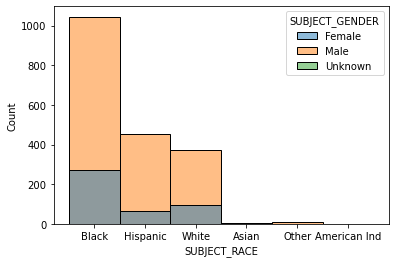

In [61]:
#initial visualisations to see if data is fit for our analysis. We look for clear margins indicating differences in 
#numbers of subjects of minority classes.

plot1 = sns.histplot(df , x= "SUBJECT_RACE" , hue= "SUBJECT_GENDER")
plot1 


<AxesSubplot:xlabel='OFFICER_RACE', ylabel='Count'>

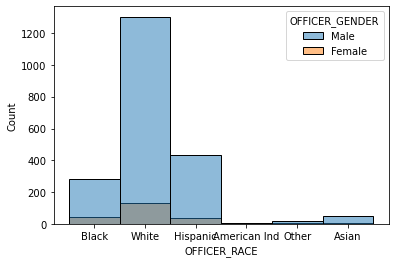

In [59]:
#race of officers
plot2 = sns.histplot(df , x= "OFFICER_RACE" , hue= "OFFICER_GENDER")
plot2
#higher counts of white officers seen

<AxesSubplot:xlabel='SUBJECT_GENDER', ylabel='Count'>

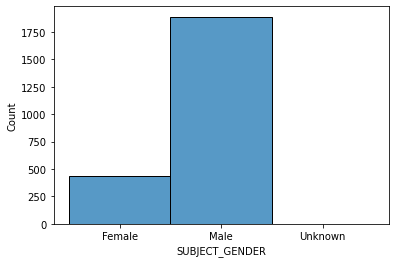

In [16]:
#gender plot
plot3 = sns.histplot(df, x="SUBJECT_GENDER")
plot3

In [17]:
print("PREPROCESSING FOR AEQUITAS")

PREPROCESSING FOR AEQUITAS


In [18]:
#For the course of the project we use Aequitas , as a bias audit toolkit. Aequitas requires a "scores" variable which 
#is going to be the output of a logistic regression applied to the data , a label_value which is a binary value column
#, here , denoting , whether the subject was arrested or not . Aequitas requires the features (here , race and 
#gender of subjects) to be categorical and hence for measuring bias we leave the variable as is . 


In [25]:
df_aeq = df.drop(df.columns[[0,1,2,3,7,8,9,10]] , axis=1)
df_aeq.head()

,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_WAS_ARRESTED
1,Black,Female,Yes
2,Hispanic,Male,Yes
3,Hispanic,Male,Yes
4,Hispanic,Male,Yes
5,Black,Male,Yes


In [27]:
#Rename for tool
df_aeq = df_aeq.rename(columns={"SUBJECT_RACE" : "race" , 
                                "SUBJECT_GENDER" : "gender" , 
                                "SUBJECT_WAS_ARRESTED" : "label_value"})
df_aeq.head()

,race,gender,label_value
1,Black,Female,Yes
2,Hispanic,Male,Yes
3,Hispanic,Male,Yes
4,Hispanic,Male,Yes
5,Black,Male,Yes


In [28]:
#label_encoding label_value to get a binary variable
df_aeq[["label_value"]] = df_aeq[["label_value"]].apply(LabelEncoder().fit_transform)
df_aeq.tail()


,race,gender,label_value
2379,Hispanic,Male,0
2380,Black,Male,1
2381,Hispanic,Male,1
2382,Black,Male,1
2383,Black,Female,1


In [29]:
print("PREPROCESSING FOR LOGISTIC REGRESSION")

PREPROCESSING FOR LOGISTIC REGRESSION


In [30]:
#dframe for log-reg
df_log = df.drop(df.columns[[0,1,9,10]] , axis=1)
df_log.head()

,OFFICER_GENDER,OFFICER_RACE,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_WAS_ARRESTED,SUBJECT_OFFENSE,SECTOR
1,Male,Black,Black,Female,Yes,APOWW,130
2,Male,White,Hispanic,Male,Yes,APOWW,230
3,Male,Black,Hispanic,Male,Yes,APOWW,430
4,Male,Black,Hispanic,Male,Yes,Evading Arrest,640
5,Male,White,Black,Male,Yes,Other Misdemeanor Arrest,340


In [31]:
x_df = df_log.drop(df_log.columns[[4]] , axis=1)
x_df = pd.get_dummies(x_df)
x_df

,OFFICER_GENDER_Female,OFFICER_GENDER_Male,OFFICER_RACE_American Ind,OFFICER_RACE_Asian,OFFICER_RACE_Black,OFFICER_RACE_Hispanic,OFFICER_RACE_Other,OFFICER_RACE_White,SUBJECT_RACE_American Ind,SUBJECT_RACE_Asian,...,SECTOR_610,SECTOR_620,SECTOR_630,SECTOR_640,SECTOR_650,SECTOR_710,SECTOR_720,SECTOR_730,SECTOR_740,SECTOR_750
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2380,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2381,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2382,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_df = df_log.drop(df_log.columns[[0,1,2,3,5,6]] , axis=1)
y_df

,SUBJECT_WAS_ARRESTED
1,Yes
2,Yes
3,Yes
4,Yes
5,Yes
...,...
2379,No
2380,Yes
2381,Yes
2382,Yes


In [33]:
y_df = y_df.apply(LabelEncoder().fit_transform)
y_df

,SUBJECT_WAS_ARRESTED
1,1
2,1
3,1
4,1
5,1
...,...
2379,0
2380,1
2381,1
2382,1


In [34]:
print("TEST-TRAIN-VAL SPLIT")

TEST-TRAIN-VAL SPLIT


In [35]:
x = x_df.values
y = y_df.values

In [39]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10


x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=1 - train_ratio)
# train is now 75% of the entire data set

x_val, x_test, y_val, y_test = sklearn.model_selection.train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
# test is now 10% of the initial data set
# validation is now 15% of the initial data set

print(x_train, x_val, x_test)

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]] [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]] [[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
